<a href="https://colab.research.google.com/github/AnaparthiSushma/sushma_project_edunet/blob/main/sushma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
files.upload()


{}

In [2]:
! pip install -q kaggle

In [ ]:


!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [3]:

!kaggle datasets download -d emmarex/plantdisease

Dataset URL: https://www.kaggle.com/datasets/emmarex/plantdisease
License(s): unknown
100% 656M/658M [00:07<00:00, 95.0MB/s]
100% 658M/658M [00:07<00:00, 97.2MB/s]


In [4]:
!ls -lrth

total 658M
-rw-r--r-- 1 root root 658M Oct 10  2019 plantdisease.zip
drwxr-xr-x 1 root root 4.0K Jul 25 13:21 sample_data
drwx------ 5 root root 4.0K Jul 28 07:45 drive


In [5]:
!unzip plantdisease.zip

Streaming output truncated to the last 5000 lines.
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08c033bd-fbc3-445a-88d1-1863070e52ce___YLCV_GCREC 2872.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08dd176c-e9d9-4746-92c3-fa8dc9074347___UF.GRC_YLCV_Lab 03057.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08f78a80-46f5-45a6-937c-4d05d61c08c2___UF.GRC_YLCV_Lab 01895.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0903aa95-6e8a-4abd-a003-126fcd9a5493___YLCV_GCREC 2806.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0911d416-d73d-4c2a-8e45-207a7ceb7c9a___YLCV_GCREC 2773.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/09188838-cc89-4925-94c5-d9563c4cb4bf___UF.GRC_YLCV_Lab 02974.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0922e026-b563-438d-b9ed-74

In [6]:

!ls -lrth PlantVillage/

total 2.0M
drwxr-xr-x 2 root root  92K Jul 28 07:48 Pepper__bell___Bacterial_spot
drwxr-xr-x 2 root root 136K Jul 28 07:48 Pepper__bell___healthy
drwxr-xr-x 2 root root 104K Jul 28 07:48 Potato___Early_blight
drwxr-xr-x 2 root root  96K Jul 28 07:48 Potato___Late_blight
drwxr-xr-x 2 root root  20K Jul 28 07:48 Potato___healthy
drwxr-xr-x 2 root root 212K Jul 28 07:48 Tomato_Bacterial_spot
drwxr-xr-x 2 root root 108K Jul 28 07:48 Tomato_Early_blight
drwxr-xr-x 2 root root 200K Jul 28 07:48 Tomato_Late_blight
drwxr-xr-x 2 root root  96K Jul 28 07:48 Tomato_Leaf_Mold
drwxr-xr-x 2 root root 168K Jul 28 07:48 Tomato_Septoria_leaf_spot
drwxr-xr-x 2 root root 152K Jul 28 07:48 Tomato_Spider_mites_Two_spotted_spider_mite
drwxr-xr-x 2 root root 136K Jul 28 07:48 Tomato__Target_Spot
drwxr-xr-x 2 root root 316K Jul 28 07:48 Tomato__Tomato_YellowLeaf__Curl_Virus
drwxr-xr-x 2 root root  36K Jul 28 07:48 Tomato__Tomato_mosaic_virus
drwxr-xr-x 2 root root 140K Jul 28 07:48 Tomato_healthy


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import random
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix
import warnings
warnings.filterwarnings('ignore')


In [8]:

imgs_path='PlantVillage/'
img_size=84
batch_size=64


In [9]:
import os
class_names = os.listdir(imgs_path)
class_names


['Pepper__bell___healthy',
 'Tomato__Target_Spot',
 'Pepper__bell___Bacterial_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Potato___healthy',
 'Tomato_healthy',
 'Tomato_Early_blight',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato_Late_blight',
 'Potato___Late_blight',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Bacterial_spot',
 'Potato___Early_blight']

In [10]:
import cv2
def get_data(data_dir):
    img_data = []
    labels=[]
    for label in class_names:
        path = os.path.join(data_dir, label)
        class_num = class_names.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                img_data.append(resized_arr)
                labels.append(class_num)
            except Exception as e:
                print(e)
    return np.array(img_data),np.array(labels)

In [14]:
def get_data(data_dir):
    img_data = []
    labels = []
    for label in class_names:
        path = os.path.join(data_dir, label)
        class_num = class_names.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                if img_arr is not None:  # Check if the image is not empty
                    resized_arr = cv2.resize(img_arr, (img_size, img_size))  # Reshaping images to preferred size
                    img_data.append(resized_arr)
                    labels.append(class_num)
                else:
                    print(f"Error: Could not read image {img} in path {path}")
            except Exception as e:
                print(e)
    return np.array(img_data), np.array(labels)

In [15]:
img_data,labels = get_data(imgs_path)
print(f'the shape of input image data is {img_data.shape}, labels shape is {labels.shape}')


Error: Could not read image svn-r6Yb5c in path PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus
the shape of input image data is (20638, 84, 84, 3), labels shape is (20638,)


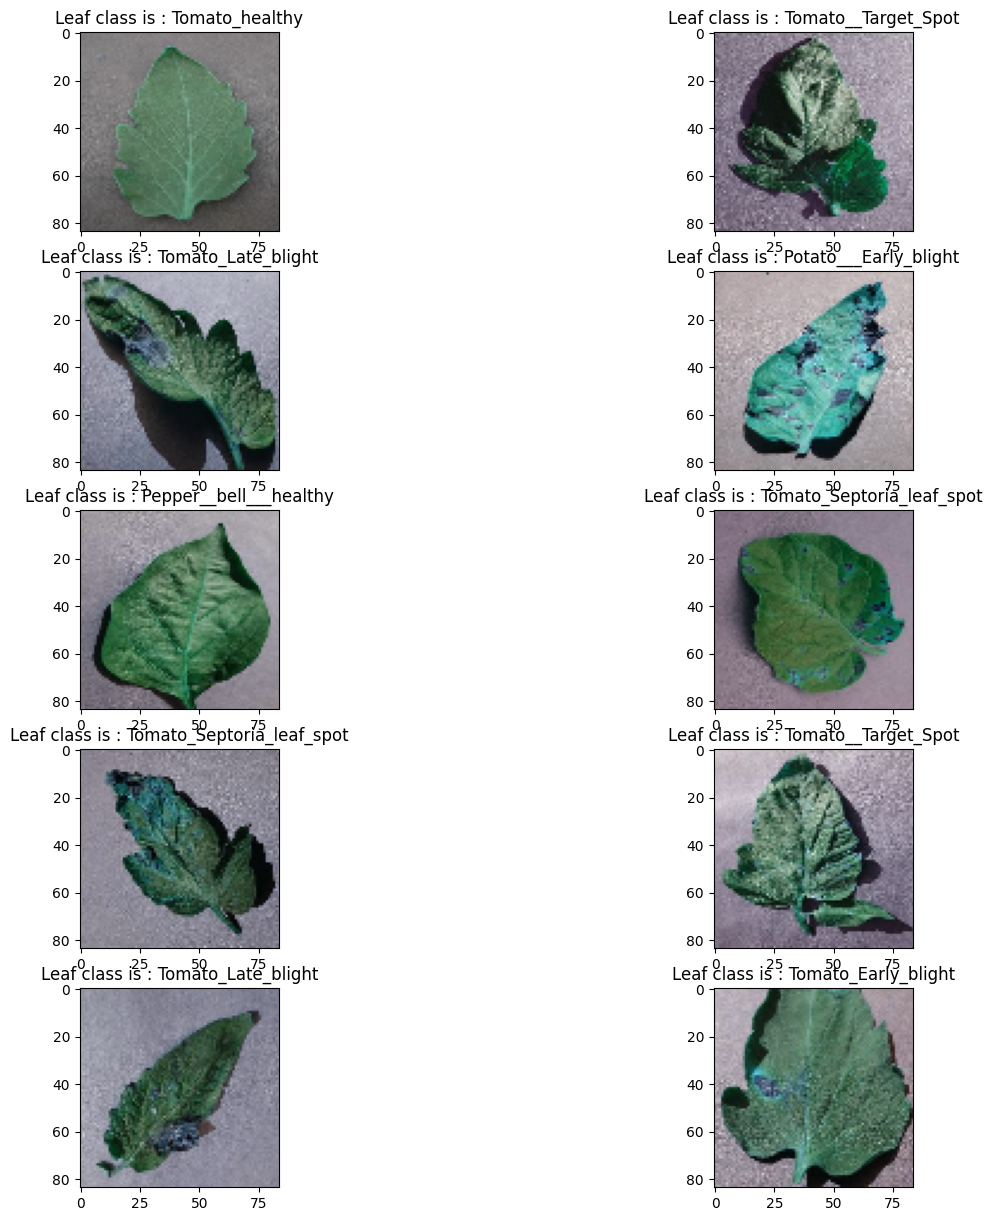

In [16]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=random.randint(0,len(img_data))
        ax[i,j].imshow(img_data[l])
        ax[i,j].set_title('Leaf class is : '+str(class_names[labels[l]]))

In [17]:
from tensorflow.keras.applications.inception_v3 import preprocess_input
img_data=preprocess_input(img_data)
img_data[0]


array([[[0.4039216 , 0.427451  , 0.5372549 ],
        [0.41960788, 0.4431373 , 0.5529412 ],
        [0.48235297, 0.5058824 , 0.6156863 ],
        ...,
        [0.35686278, 0.41960788, 0.5529412 ],
        [0.28627455, 0.34901965, 0.48235297],
        [0.37254906, 0.427451  , 0.56078434]],

       [[0.35686278, 0.3803922 , 0.4901961 ],
        [0.49803925, 0.52156866, 0.6313726 ],
        [0.48235297, 0.5058824 , 0.6156863 ],
        ...,
        [0.30196083, 0.36470592, 0.49803925],
        [0.30980396, 0.37254906, 0.5058824 ],
        [0.27058828, 0.33333337, 0.4666667 ]],

       [[0.43529415, 0.45882356, 0.5686275 ],
        [0.45882356, 0.4901961 , 0.5921569 ],
        [0.5529412 , 0.58431375, 0.6862745 ],
        ...,
        [0.23921573, 0.2941177 , 0.427451  ],
        [0.23921573, 0.30196083, 0.43529415],
        [0.254902  , 0.3176471 , 0.45098042]],

       ...,

       [[0.37254906, 0.38823533, 0.5294118 ],
        [0.3411765 , 0.35686278, 0.5058824 ],
        [0.30196083, 0

In [18]:
from tensorflow.keras.utils import to_categorical
labels=to_categorical(labels)
labels[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [19]:
X_train,X_test,y_train,y_test=train_test_split(img_data,labels,test_size=0.2,random_state=0,stratify=labels)
print(f'X_train size is {X_train.shape}, X_test shape is {X_test.shape}')

X_train size is (16510, 84, 84, 3), X_test shape is (4128, 84, 84, 3)


In [20]:
del img_data,labels


In [21]:
from tensorflow.keras.layers import *

from tensorflow.keras.models import *


In [22]:
from tensorflow.keras.applications.vgg19 import VGG19
vgg = VGG19(input_shape=(img_size,img_size,3), include_top=False, weights="imagenet")

for layer in vgg.layers[:19]:
        layer.trainable = False

model2=Sequential()
model2.add(vgg)
model2.add(MaxPool2D((2,2),strides=(2,2)))
model2.add(Flatten())
model2.add(Dense(len(class_names),activation='softmax'))
model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model2.summary()


80134624/80134624 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 2, 2, 512)         20024384  
                                                                 
 max_pooling2d (MaxPooling2  (None, 1, 1, 512)         0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 15)                7695      
                                                                 
Total params: 20032079 (76.42 MB)
Trainable params: 4727311 (18.03 MB)
Non-trainable params: 15304768 (58.38 MB)
_________________________________________________________________


In [23]:
history2=model2.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=batch_size)

Epoch 1/10
258/258 [==============================] - 33s 100ms/step - loss: 0.8407 - accuracy: 0.7266 - val_loss: 0.4323 - val_accuracy: 0.8554
Epoch 2/10
258/258 [==============================] - 20s 78ms/step - loss: 0.3451 - accuracy: 0.8806 - val_loss: 0.3373 - val_accuracy: 0.8886
Epoch 3/10
258/258 [==============================] - 22s 87ms/step - loss: 0.2313 - accuracy: 0.9193 - val_loss: 0.3306 - val_accuracy: 0.8835
Epoch 4/10
258/258 [==============================] - 22s 87ms/step - loss: 0.1559 - accuracy: 0.9459 - val_loss: 0.2857 - val_accuracy: 0.9050
Epoch 5/10
258/258 [==============================] - 23s 90ms/step - loss: 0.1273 - accuracy: 0.9545 - val_loss: 0.3005 - val_accuracy: 0.9106
Epoch 6/10
258/258 [==============================] - 23s 90ms/step - loss: 0.0763 - accuracy: 0.9739 - val_loss: 0.2908 - val_accuracy: 0.9138
Epoch 7/10
258/258 [==============================] - 23s 89ms/step - loss: 0.0634 - accuracy: 0.9772 - val_loss: 0.3996 - val_accuracy

In [24]:
# Save the trained model
model2.save('plant_disease_model.keras')


Text(0.5, 1.0, 'val accuracy')

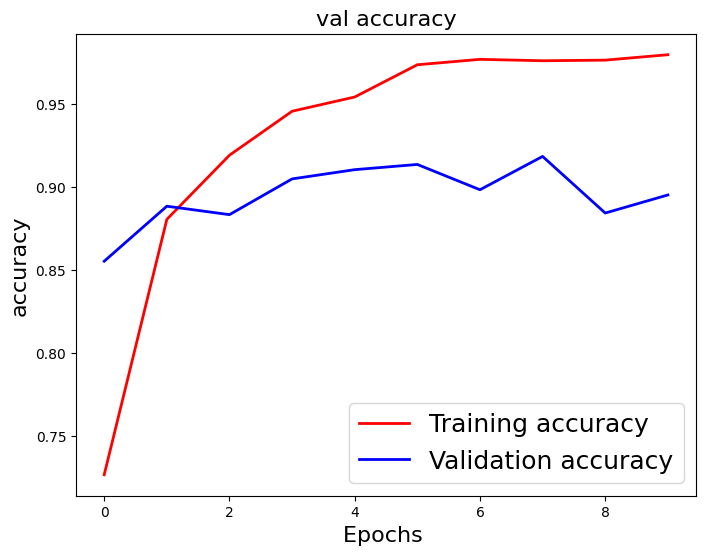

In [25]:
plt.figure(figsize=[8,6])
plt.plot(history2.history['accuracy'],'r',linewidth=2.0)
plt.plot(history2.history['val_accuracy'],'b',linewidth=2.0)
plt.legend(['Training accuracy', 'Validation accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('accuracy',fontsize=16)
plt.title('val accuracy',fontsize=16)


In [26]:

vgg_acc=model2.evaluate(X_test,y_test)
print('accuracy of the model is ',vgg_acc[1])


129/129 [==============================] - 4s 33ms/step - loss: 0.4534 - accuracy: 0.8953
accuracy of the model is  0.895348846912384


In [27]:
from google.colab import files
files.upload()

KeyboardInterrupt: 

(1, 84, 84, 3)

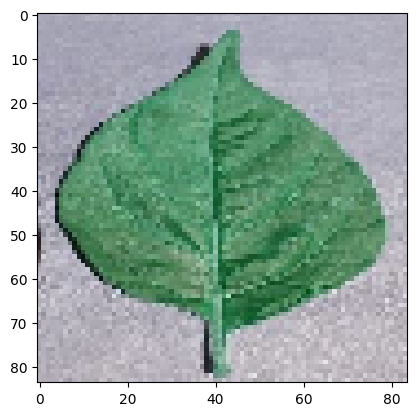

In [28]:
#image_name='PlantVillage/Potato___healthy/03da9931-e514-4cc7-b04a-8f474a133ce5___RS_HL 1830.JPG'   # enter image to test
image_name='/content/bell_pepper_healthy.png'
# plt.imshow(plt.imread(image_name))
x1=[]
img_1 = cv2.imread(image_name, cv2.IMREAD_COLOR)
# from google.colab.patches import cv2_imshow
# cv2_imshow(img_1)
resized_arr_1 = cv2.resize(img_1, (img_size, img_size)) # Reshaping images to preferred size
plt.imshow(resized_arr_1)
x1.append([resized_arr_1])
x1=np.array(x1)
x1 = preprocess_input(x1)
x1 = x1.reshape(-1, img_size, img_size, 3)
x1.shape

1/1 [==============================] - 1s 809ms/step
[[9.99563515e-01 7.61101455e-15 1.15810856e-07 4.23453178e-17
  4.36354108e-04 2.68700760e-23 2.48625780e-18 1.11112369e-11
  2.24114309e-15 9.12365954e-15 5.98483273e-23 1.70272118e-17
  5.16510086e-14 1.10701059e-16 4.22119843e-15]]
output is  Pepper__bell___healthy


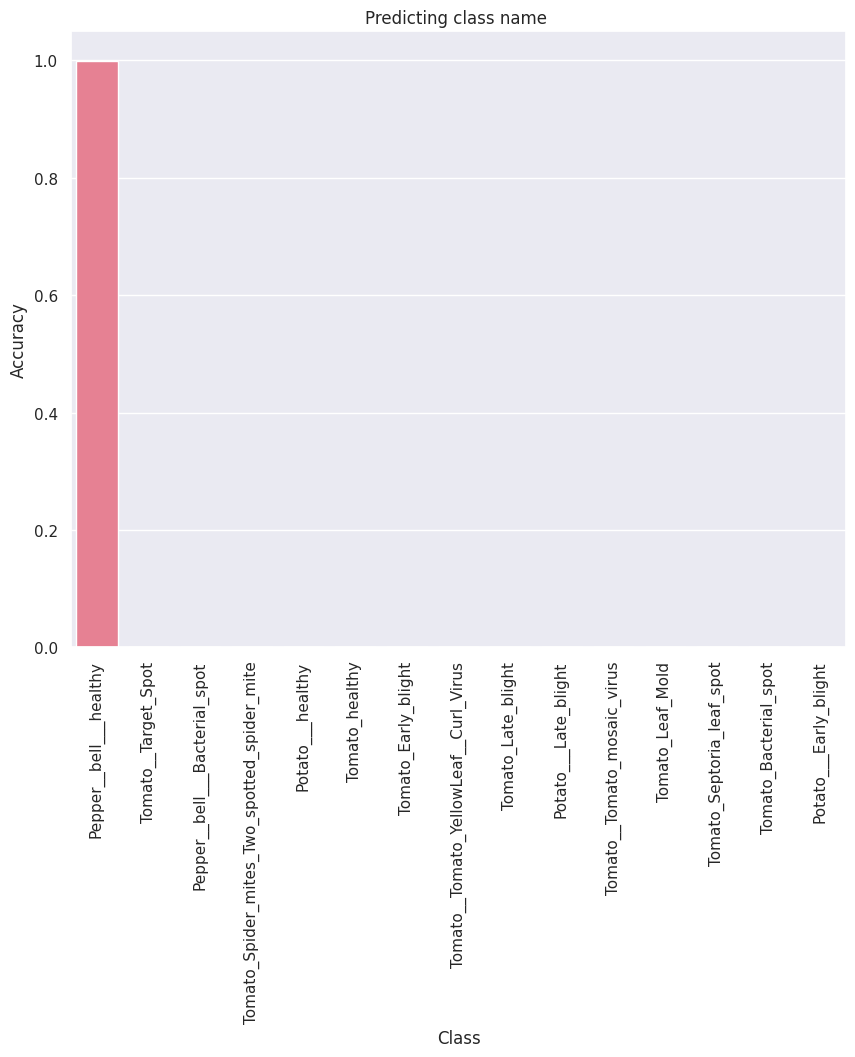

In [29]:
pred=model2.predict(x1) # for predicting class
print(pred)
# print(pred)
 # predicting probability
labels_pred=np.argmax(pred,axis=1)
# print(labels_pred)
print('output is ',class_names[labels_pred[0]])
# labels=get_labels(labels_pred)
pred_results=pd.DataFrame(data=pred,columns=class_names)
import seaborn as sns
fig=plt.figure(figsize=(10,8))
sns.set_theme(style="darkgrid")
ax=sns.barplot(data=pred_results)
ax.set_xticklabels(class_names,rotation=90)
ax.set_xlabel('Class')
ax.set_ylabel('Accuracy')
ax.set_title('Predicting class name ')
plt.show()


In [53]:
! pip install streamlit -q


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 63.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 75.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.4 MB/s eta 0:00:00


In [54]:
!wget -q -O - ipv4.icanhazip.com


34.168.67.246


In [ ]:
! streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.168.67.246:8501

your url is: https://fruity-llamas-stare.loca.lt
2024-07-28 08:27:54.225910: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-28 08:27:54.225979: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-28 08:27:54.227898: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-28 08:27:55.898848: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-07-28 08:27